# Clustering - KNN

In [1]:
!pip install --upgrade scikit-learn

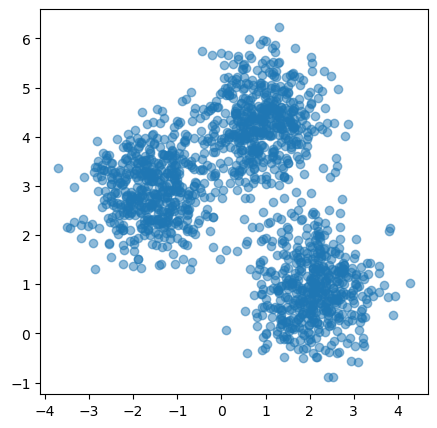

In [1]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1],alpha=0.5,)
plt.show()

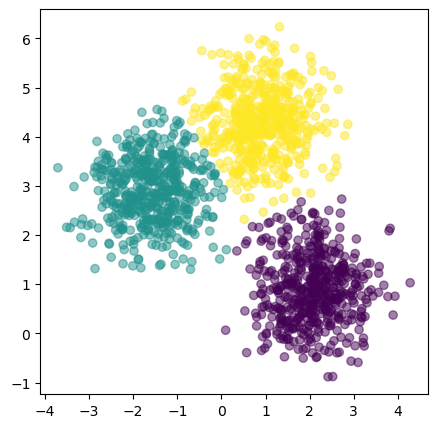

Model 1 Silhouette Score: 0.6056399066187851


In [24]:
from sklearn import datasets, cluster
import matplotlib.pyplot as plt

# Generate the synthetic dataset
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

# Apply KMeans clustering
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
pred = kmeans.predict(X)

# Plot the results
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.show()
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

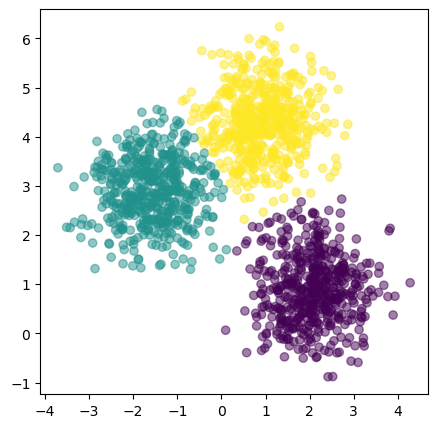

In [25]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

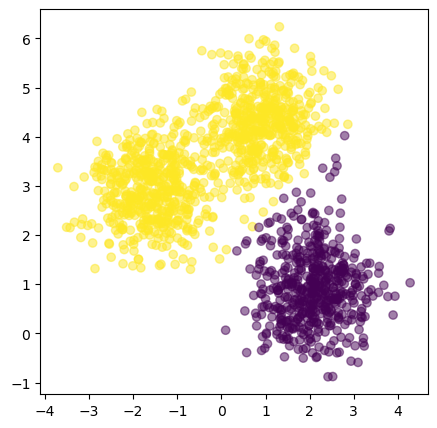

In [4]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

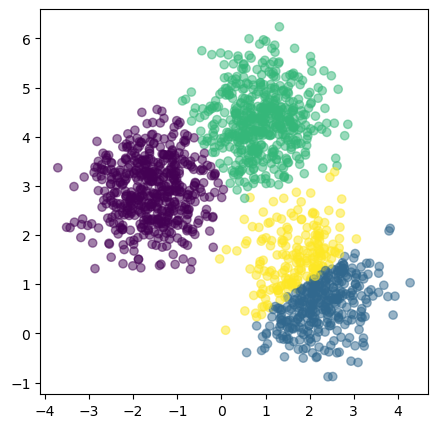

In [5]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

# Agglomerative clustering

In [6]:
from sklearn import cluster

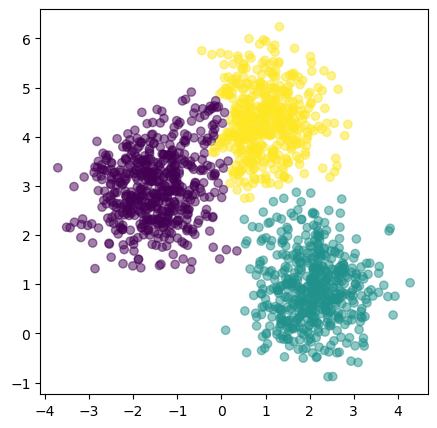

In [7]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

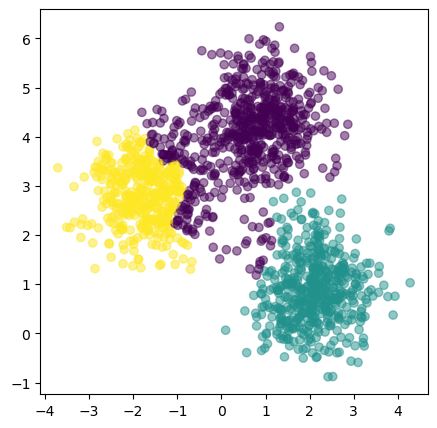

In [8]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

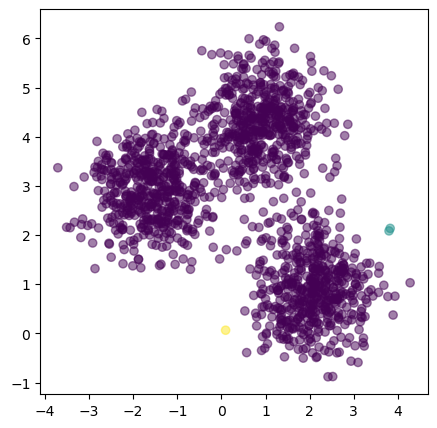

In [9]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='single')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

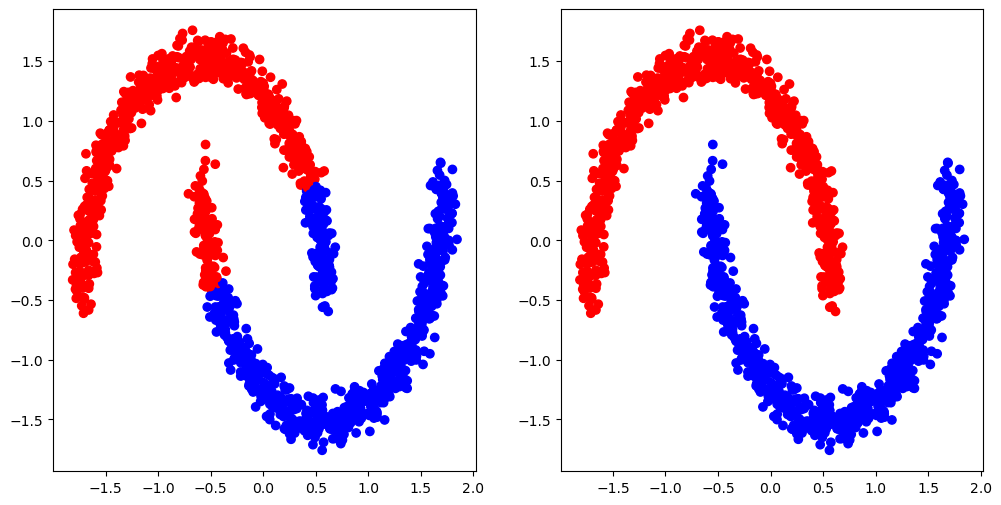

Model 1 Silhouette Score: 0.4975631406324445
Model 2 Silhouette Score: 0.3917655652762337


In [26]:
#from matplotlib.lines import Line2D
#from sklearn.metrics import silhouette_score

# different algorithms are good for different applications - kmeans and single agglomerative have so far shown very different results

n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

#DBSCAN

In [27]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)


In [28]:
dbs = cluster.DBSCAN(eps=0.05, min_samples = 5) #change maximum distance and see efect
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

pred = dbs.fit_predict(X)
pred

array([ 0,  0,  1, ...,  1,  0, -1], dtype=int64)

In [29]:
import numpy as np

# Get the distinct classes (clusters) in pred
unique_classes = np.unique(pred)

In [30]:

unique_classes

array([-1,  0,  1], dtype=int64)

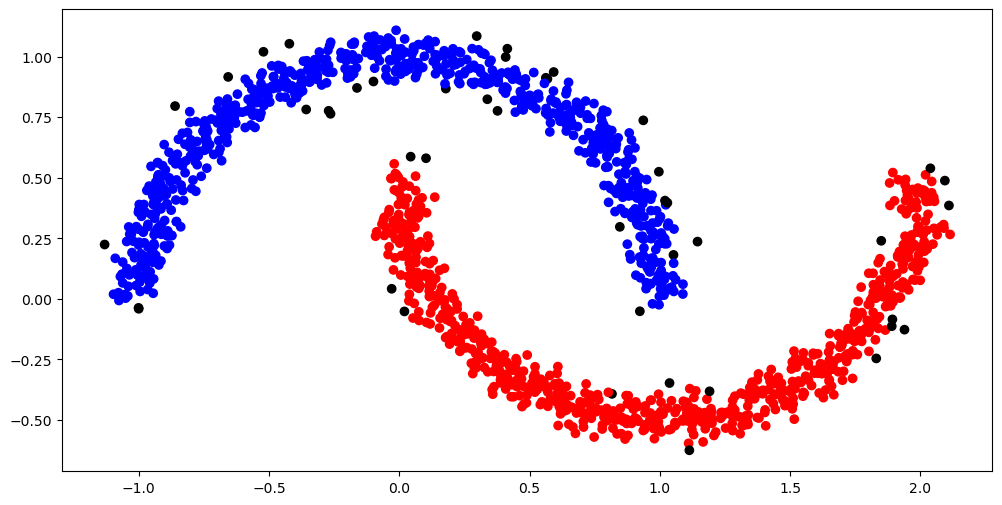

In [31]:

plt.figure(figsize=(12, 6))

colors = np.array(['blue', 'red', "black"])
plt.scatter(X[:, 0], X[:, 1], color=colors[pred])

plt.show()

# Clustering metrics

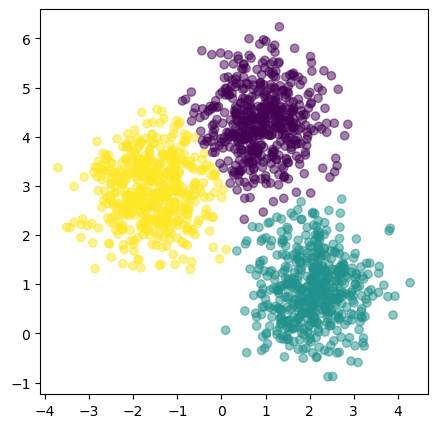

Model 1 Silhouette Score: 0.6056399066187851


In [16]:
from sklearn.metrics import silhouette_score
# silhouette score is somewhat of a technical measue. I behaves well with intuitive undertandings of clusters as "blobs"

n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

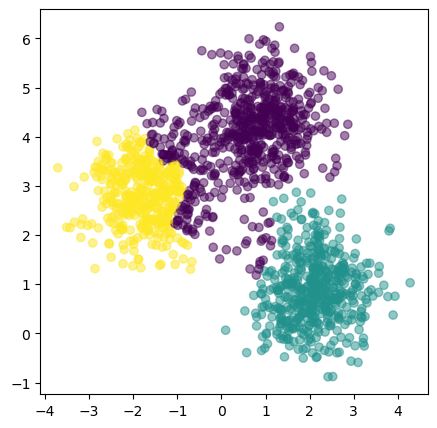

Model 2 Silhouette Score: 0.528140155059521


In [17]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

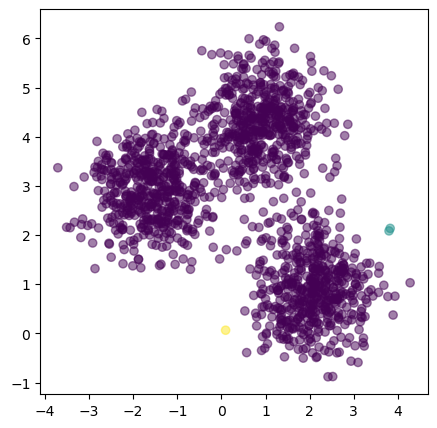

Model 2 Silhouette Score: -0.00722867792759676


In [18]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='single')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

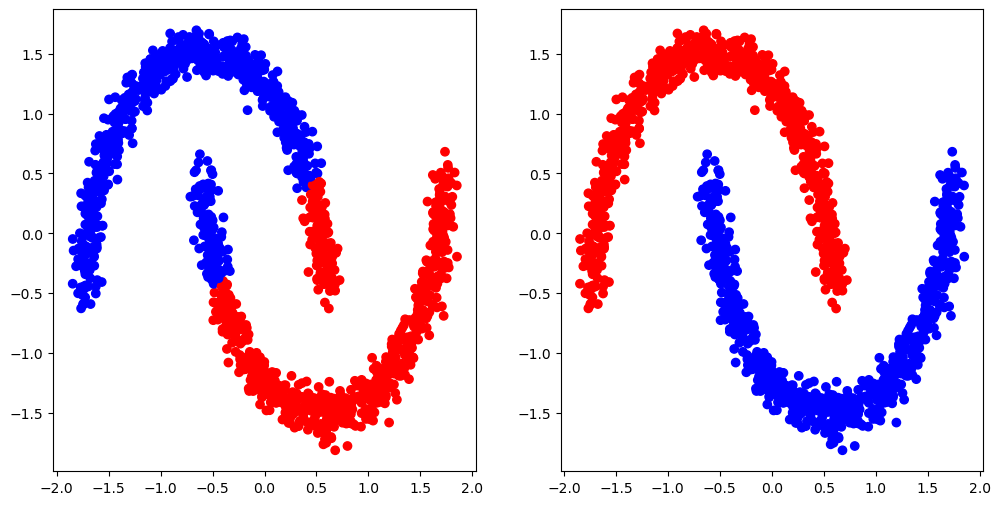

Model 1 Silhouette Score: 0.4995872663840096
Model 2 Silhouette Score: 0.39044044278187207


In [19]:
#but no so well when we start having "weird" cluster logics

n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

# Number of clusters

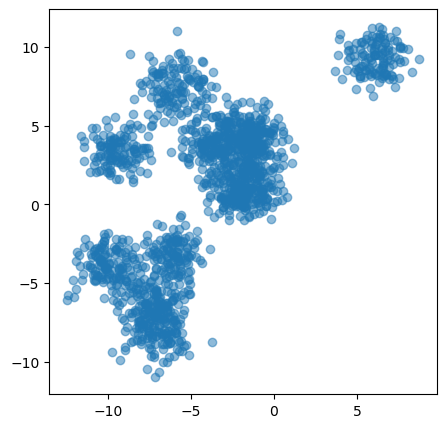

In [20]:
from sklearn import cluster, datasets

n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=12, cluster_std=1, n_features=2, random_state=1)
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1],alpha=0.5)
plt.show()
#even though data was generated with 12 centers, 5 clusters could make sense, even 7 or 8

In [21]:
!pip install yellowbrick

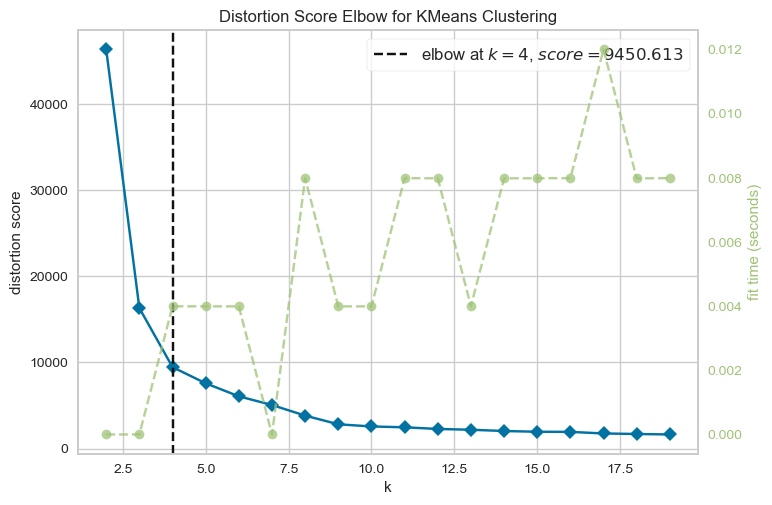

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# two elbows here are interesting to consider
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

C:\Users\ramya\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\ramya\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


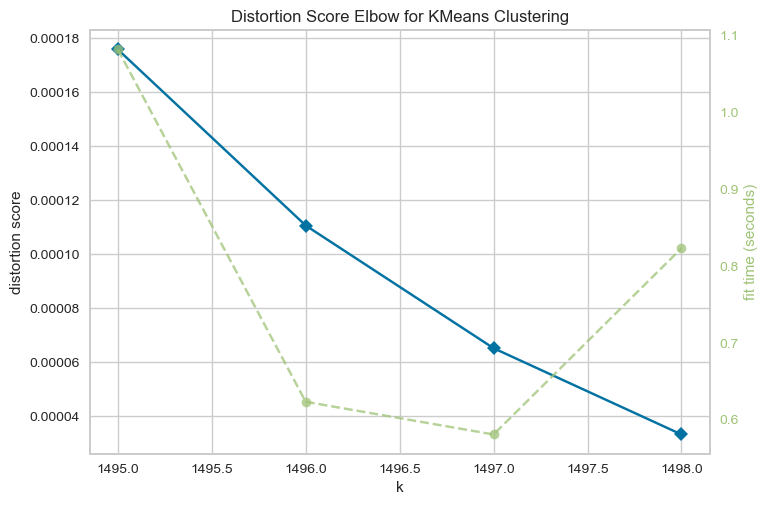

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#best score =!= most useful score
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1495,1499))
visualizer.fit(X)
visualizer.poof()